# Lob01 Supervised Learning - Classification - Naives Bayesian -Binary

## Name: Thantham  Khamyai
## Student ID: 122097

## Tasks to completed

* **Generate 2 classes** data using Scikit-learn package
* Make **Guassian Naive Classifier** into class form
* **Fit model** using splitted training and testing data, and do **model evaluation** accordingly

Firstly, import necesssary packages for constructing codes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Generate dataset of binary classification and preprocessing

Before making Naives Guassian Classifier, we should have some dataset which contains 2 classes of targets for testing the created classifier

To do that, using make_classification imported from sklearn.datsets to automatically generate mentioned data, and load them into X and y

### 1.1 Generate 2 classes dataset

The dataset generated is based on the lab work tutorial (not modified)

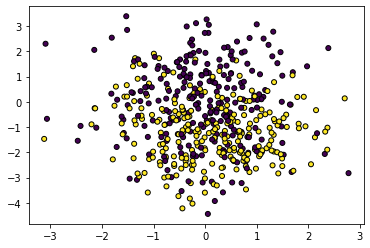

In [2]:
from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset condition to generate

# 1) 4 informative features out of 10
# 2) 2 redundant features, overlapping with that 4 informative features
# 3) and 4 noisy features
# 4) Also, make std wider using n_clusters=2 from 500 samples

# however, fixing random_state can be done

X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)

# plotting on how the generated data looks like by scatter plot
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')


Obviously, The data now is not linear anymore. A lot of points are overlapped, mixed between 2 classes. This responses the binary classification to Naive Bayesian doing its role

### 1.2 Scaling Features

For faster convergence, features should be scaled based on its distribution. Standard Scaling will be implemented to scale value following the standard deviation and mean

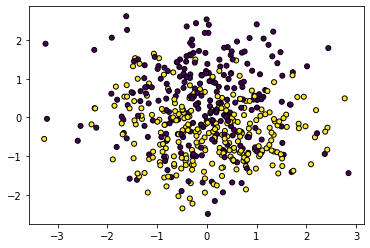

In [3]:
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

# plotting on how the scaled data looks like by scatter plot
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

### 1.3 Train test Splitting

As long as we have learned about from scratch coding. We are proud to implement constructive way to do coding.

So, even small procedure to be done, we can reuse old code of train_test_split from last lab to do train test splitting

In [4]:
def train_test_split(X, Y, test_size):
    
    # impoer random package
    import random
    
    # randomize idx of sample X by number of test size calculated from test ratio using 'random.sample' function
    idx_train = random.sample(set(np.arange(X.shape[0])), round((1-test_size)*X.shape[0]))
    
    #create idx of test data
    idx_test = np.array([i for i in range(X.shape[0]) if i not in idx_train])
    
    #split X, Y
    X_train = X[idx_train]
    X_test = X[idx_test]
    Y_train = Y[idx_train]
    Y_test = Y[idx_test]

    return X_train, X_test, Y_train, Y_test

# Perform splitting from created function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## 2. Naive Bayes Classifier

From the lesson, classification model of Naive Bayesian is known as following precedure to do.

Here is algorithm calculating training process and testing process


1) Calculate Prior 0 and 1 <br>
    $$P(y = 1) = \frac{\Sigma_{i=1}^m 1(y=1)}{m}$$
    $$P(y = 0) = \frac{\Sigma_{i=1}^m 1(y=0)}{m}$$
    
2) Calculate Mean and Std array list <br>
$$\mu_{0j} = \frac{\sum_{i=1}^m x_{ij}}{m} $$

3) Calculate Gaussian pdf <br>
$$ P(x \mid y=1 ; \mu_1, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_1)^{2}}{2\sigma^{2}}}$$
$$ P(x \mid y=0 ; \mu_0, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_0)^{2}}{2\sigma^{2}}}$$

4) Calculate Total Likelihood <br>
$$P(x \mid y) = \prod_{i=1}^n P( x_i \mid y )$$

5) Calculate Posteriors <br>
$$P(y)P(x|y)$$

6) Summarize Y_hat <br>

However, there is alternative way to conclude predicted y such as output them into probabilistic term apart from interger class term.
This lab will try to construct that function to be available for both predict as interger (argmax) class and probabilistic y hat also

In [5]:
class GaussianNaive_Binary:
    
    # no need contructor to receive model parameters
    
    def fit(self, X_train, y_train):
        
        # In fitting we just prepare Prior of y = 0, Prior of y = 1, 
        
        # 1) Calculate Prior 0 and 1
        self.prior0, self.prior1 = self.calc_prior_01(X_train, y_train)
        
        # 2) Calculate Mean and Std for each feature and prior 0 and 1 (2, n)
        self.mean = self.calc_mean(X_train, y_train, k=2)
        self.std = self.calc_std(X_train, y_train, k=2)
        
    def predict(self, X_test):
        
        # 3) Calculate Gaussian pdf for each prior 0 and 1
        px_y0 = self.calc_gaussian_pdf(X_test, self.mean[0, :], self.std[0, :])
        px_y1 = self.calc_gaussian_pdf(X_test, self.mean[1, :], self.std[0, :])
    
        # 4) Calculate Total Likelihood for each prior 0 and 1
        total_likelihood0 = self.calc_totallikelihood(px_y0)
        total_likelihood1 = self.calc_totallikelihood(px_y1)
        
        # 5) Calculate posterior for each 0 and 1
        posterior0 = self.calc_posterior(self.prior0, total_likelihood0)    
        posterior1 = self.calc_posterior(self.prior1, total_likelihood1)
        
        # 6) Summarize Y hat by comparing agrmax of which higher index
        y_hat = np.array(1 * (posterior1 > posterior0)) # comparison returning True/False array -> *1 to convert them to argmax class 
        
        return y_hat
    
    # The function to return probailistic form of predicted
    def get_posterior(self, X_test): 
        
        # Do the same as predict function
        
        px_y0 = self.calc_gaussian_pdf(X_test, self.mean[0, :], self.std[0, :])
        px_y1 = self.calc_gaussian_pdf(X_test, self.mean[1, :], self.std[0, :])
    
        total_likelihood0 = self.calc_totallikelihood(px_y0)
        total_likelihood1 = self.calc_totallikelihood(px_y1)
        
        posterior0 = self.calc_posterior(self.prior0, total_likelihood0)    
        posterior1 = self.calc_posterior(self.prior1, total_likelihood1)
        
        # returning posterior array by column stacking 2 posteriors in to array output
        return np.column_stack((posterior0.squeeze(),posterior1.squeeze()))
        
    # The function for generating prior of y=0 and y=1
    def calc_prior_01(self, X_train, y_train):
        
        m_0 = len(X_train[y_train==0]) # get number of samples which has y = 0
        m_1 = len(X_train[y_train==1]) # get number of samples which have y = 1
        
        prior_0 = m_0 / (m_0 + m_1)  # P(y=0) = (m of y=0) / ( all samples)
        prior_1 = m_1 / (m_0 + m_1)  # P(y=1) = (m of y=1) / ( all samples)
        
        return prior_0, prior_1
    
    # The function for calculating mean for each feature in each prior 0 and 1 of training set
    def calc_mean(self, X, y, k):
        
        n = X.shape[1] # get number of features
        mean = np.zeros((k, n)) # generate zeros matrix of shape (n_class, n_features)
    
        for class_i in range(k): # looping for each 0 and 1
            
            X_class_i = X[y==class_i] # get X which have y equal to that classes
            mean[class_i, :] = X_class_i.mean(axis=0) # calculate mean for each feature following classes
    
        return mean
    
     # The function for calculating std for each feature in each prior 0 and 1 of training set
    def calc_std(self, X, y, k):
        
        n = X.shape[1] # get number of features
        std = np.zeros((k, n)) # generate zeros matrix of shape (n_class, n_features)
        
        for class_i in range(k): # in binary has only 0 and 1
            X_class_i = X[y==class_i] # get X which have y equal to that classes
            std[class_i: :] = X_class_i.std(axis=0) # calculate std for each feature following classes
        
        return std
    
    # The function for calculating Gaussian probability of X 
    def calc_gaussian_pdf(self, X, mean, std):
        
    #         left = 1 / (np.sqrt(2 * np.pi) * std)
    #         e = (X - mean) ** 2 / (2 * (std ** 2))
    #         right = np.exp(-e)
    #         return left * right
        return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp( -( (X-mean)**2 / (2 * (std**2))  ) )
        
    
    def calc_totallikelihood(self, px_y):
       
        # P(feature|class) calculated by product the p(x|y) to likelihood term
        total_likelihood = np.prod(px_y, axis=1)
        
        return total_likelihood

    def calc_posterior(self, prior, total_likelihood):
        # just returning multiplication outcome
        return prior * total_likelihood

## 3. Model Fitting and Evaluation

From model class construction, we can implement instantiating model and fit it using training data

### 3.1 Model instance creation and fitting model

In [6]:
model = GaussianNaive_Binary()
model.fit(X_train, y_train)

### 3.2 Predict y hat using argmax method to obtain interger result of target class 

Normally, we can directly call model.predict function to get prediction result as interger class target

In [7]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0
 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0
 1 1]


For evaluation, we can show average precision score

In [13]:
from sklearn.metrics import classification_report, accuracy_score, average_precision_score

print(f"Average precision score: {average_precision_score(y_test, y_pred)} \n")

print(f"Aaccuracy score: {accuracy_score(y_test, y_pred)} \n")

print(f"Classification report: \n {classification_report(y_test, y_pred)}")

Average precision score: 0.7970191713048856 

Aaccuracy score: 0.8333333333333334 

Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        73
           1       0.87      0.79      0.83        77

    accuracy                           0.83       150
   macro avg       0.84      0.83      0.83       150
weighted avg       0.84      0.83      0.83       150



### 3.3 Returning posterior array to obtain posterior value for each class

Alternatively, to prove the class number result getting from prediction. I have created posterior returning from prediction just to see what are the values from the model

In [9]:
y_pred_posterior = model.get_posterior(X_test)

To prove argmax, we can get the posterior and conclude maximum index of integer class by following

In [14]:
print(f'posteriors gettting from prediction (head 10 samples) is \n{y_pred_posterior[:10]}\n\n')
print(f'argmax class from posterior (head 10 samples) is \n {np.argmax(y_pred_posterior[:10], axis=1)}')

posteriors gettting from prediction (head 10 samples) is 
[[7.18185616e-07 4.51241522e-08]
 [2.95955019e-06 2.48834776e-06]
 [2.96953601e-06 9.87482137e-07]
 [2.25843960e-07 1.04121037e-08]
 [6.34996548e-07 4.99445109e-08]
 [3.62781641e-08 1.22492429e-10]
 [5.02714382e-06 3.40340172e-06]
 [1.66516612e-06 1.16912196e-05]
 [1.96405480e-06 3.25228388e-06]
 [3.67701817e-06 4.68012516e-08]]


argmax class from posterior (head 10 samples) is 
 [0 0 0 0 0 0 0 1 1 0]
